# Bike Sharing Case Study

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Exploratory Data Analysis

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dataset from csv to pandas dataframe
df=pd.read_csv('day.csv',low_memory=False)
#print shape of data frame
df.shape

(730, 16)

In [3]:
# Print dataset sample
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Describe dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Print datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Converting dteday column from object to datetime format
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
# Check numerical and categorical varibales
df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

#### Understanding Data
- Categorical Variables: yr,holiday,workingday,weathersit,season,weekday,mnth
- Numerical Variables: temp,hum,casual,windspeed,registered,atemp,cnt,instant,dteday
- No Missing data in the dataset
- cnt is count of total rental bikes including both casual and registered


#### Data Cleaning

In [8]:
# Dropping un-necessary features from the dataset
# casual and registered columns can be dropped as they some up to cnt are are therefore not required.
# instant is just an index column and does not affect cnt in anyway
# dteday cal be dropped as we already have weekday and month column

df.drop(['casual','registered','instant','dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
# Map categorical variables from Data Dictionary
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df['mnth'] = df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug',9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

df['weekday'] = df['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'})

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


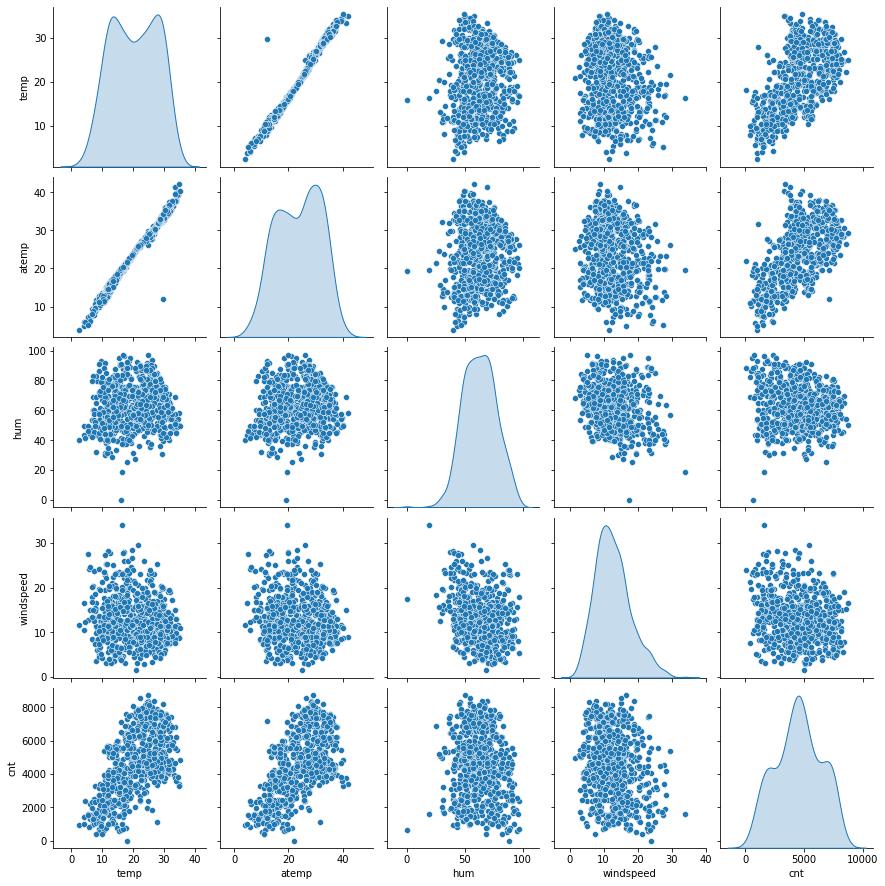

In [11]:
#Visualize numerical variables 
num_var=['temp','atemp','hum','windspeed','cnt']
num_df=df[num_var]
sns.pairplot(num_df,diag_kind='kde')
plt.show()

##### Insights
1. temp and atemp have a linear relationship
2. Other features seem to be uniformly distributed

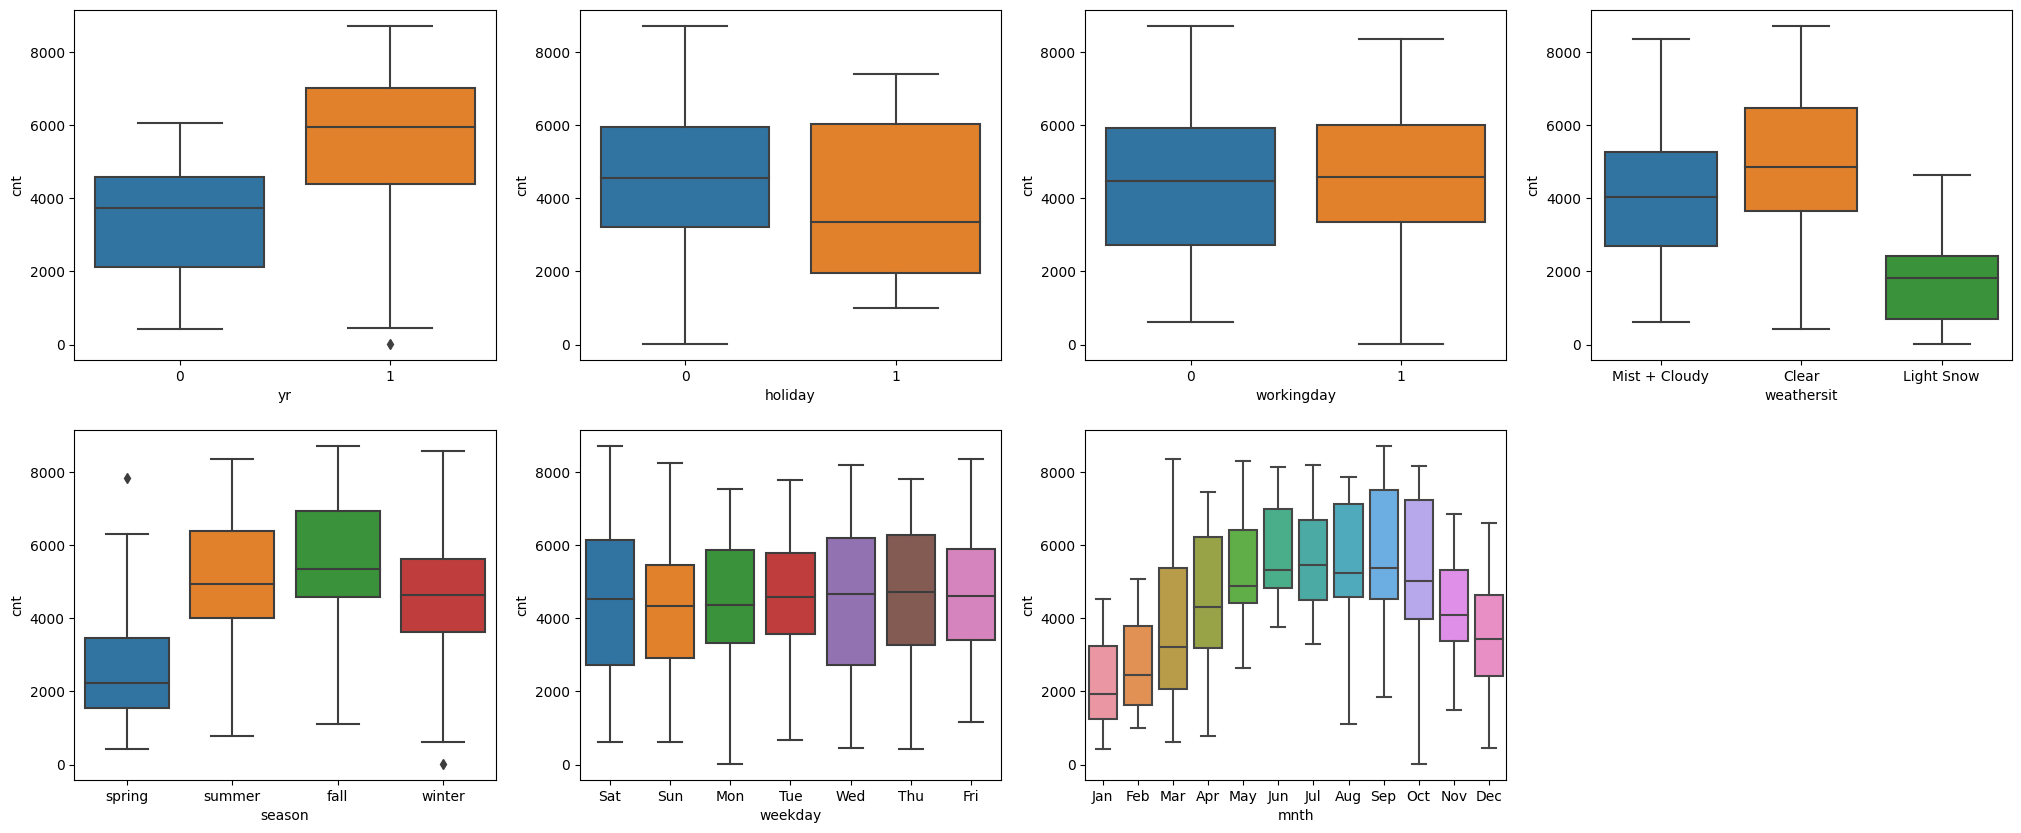

In [12]:
#Visualize categorical variables against cnt
plt.figure(figsize=(25,10))
plt.subplot(2,4,1)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(2,4,2)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(2,4,3)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(2,4,4)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(2,4,5)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,4,6)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(2,4,7)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.show()

##### Insights
1. Bike rentals seem to be more popular when weather is clear and seem to decrease as weather gets worse. Weathersit looks like a good indicator for predicting bike rentals.
2. Bike rentals seem to be doing better in 2019 as compared to 2018.
3. Surprisingly, bike rentals seem to be lower on holidays. Most people may be using bikes for commuting to work.
4. Bike rentals seem to pick up during months 5,6,7,8,9 and then taper off during the end and beginning of the year.Looks like a good indicator for predicting bike rentals.
5. Bike rentals also seems to be the highest for season 3 (fall) followed by season 2 (summer).Looks like a good indicator for predicting bike rentals.
6. Weekday doesn't seem to show much change and may not be useful for predicting bike rentals.

<AxesSubplot:>

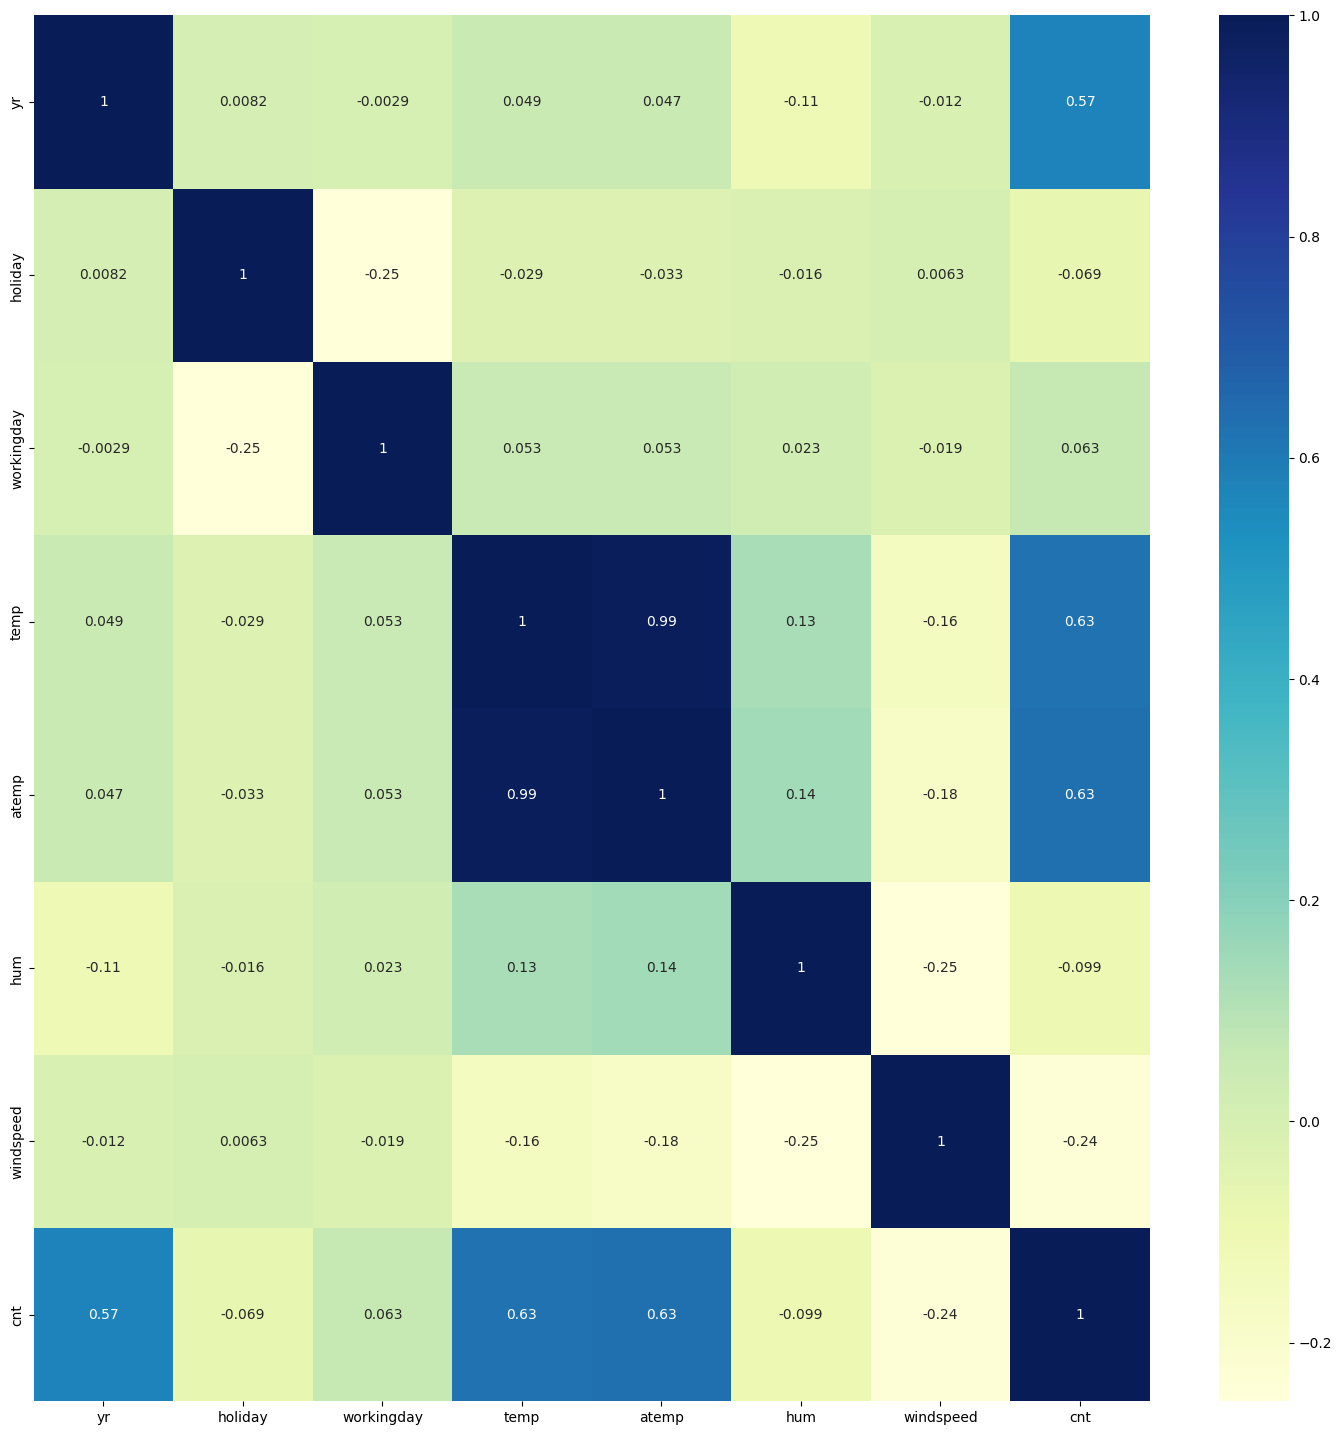

In [13]:
# Now lets take a look at the heatmap to visualize co-relations
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

### Data Pre-processing

##### Data Encoding

In [14]:
# Create dummy varibales for month,weekday,weathersit and season
month = pd.get_dummies(df['mnth'],drop_first=True)
weekday = pd.get_dummies(df['weekday'],drop_first=True)
weathersit = pd.get_dummies(df['weathersit'],drop_first=True)
season = pd.get_dummies(df['season'],drop_first=True)

In [15]:
# Concatinate dummy variables to dataset
df=pd.concat([df,month,weekday,weathersit,season],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [16]:
# Drop original variables for which dummy were created
df.drop(['mnth','weekday','weathersit','season'],axis=1,inplace=True)

df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


##### Split Data into train and test set

In [17]:
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

print("Train Data Shape",df_train.shape)
print("Test Data Shape",df_test.shape)

Train Data Shape (510, 30)
Test Data Shape (220, 30)


##### Rescaling features

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
num_var=['temp','atemp','hum','windspeed','cnt']
df_train[num_var]=scaler.fit_transform(df_train[num_var])

df_train[num_var].head()

,temp,atemp,hum,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [19]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing training dataset into X and Y

In [20]:
y_train=df_train.pop('cnt')
X_train=df_train

##### Recursive Feature Elimination - RFE

In [21]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
# Running RFE with the output number of variables equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
#run RFE
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 10),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 13),
 ('Tue', False, 11),
 ('Wed', False, 14),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [24]:
#Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jul', 'Sep',
       'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [25]:
#Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

##### Building model using statsmodel, for detailed statistics

In [26]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [27]:
# Adding a constant variables
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [28]:
#Running the linear model
lm=sm.OLS(y_train,X_train_rfe).fit()

In [29]:
#Print Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.11e-191
Time:                        21:22:44   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200

- holiday variable seems to have high p-value and therefore needs to be dropped.

In [30]:
#Dropping varibale holiday as it has high p-value and building the model again
X_train_rfe = X_train_rfe.drop(['holiday'],axis=1)
#Running the linear model
lm=sm.OLS(y_train,X_train_rfe).fit()
#Print Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.11e-191
Time:                        21:22:44   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1811      0.042      4.301

- Now Lets take a look at the VIF values

In [31]:
# Dropping const from X_train to check VIF
X_train_rfe = X_train_rfe.drop(['const'],axis=1)

In [32]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending =False)
vif

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
7,Sat,4.91
11,spring,4.80
8,Sun,4.76
13,winter,3.69
12,summer,3.04
10,Mist + Cloudy,2.31


In [33]:
#Dropping varibale hum as it has high VIF and building the model again
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)
#Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)
#Running the linear model
lm=sm.OLS(y_train,X_train_rfe).fit()
#Print Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.28e-188
Time:                        21:22:44   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1008      0.038      2.624

In [34]:
# Dropping const from X_train to check VIF
X_train_rfe = X_train_rfe.drop(['const'],axis=1)
#Calculating VIF
vif=pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending =False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
6,Sat,4.45
7,Sun,4.21
10,spring,3.82
12,winter,2.78
11,summer,2.76
0,yr,2.07
4,Jul,1.60


In [35]:
#Dropping varibale workingday as it has high VIF and building the model again
X_train_rfe = X_train_rfe.drop(['workingday'],axis=1)
#Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)
#Running the linear model
lm=sm.OLS(y_train,X_train_rfe).fit()
#Print Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.06e-186
Time:                        21:22:44   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2003      0.030      6.760

In [36]:
#Dropping varibale Sat as it has high p-value and building the model again
X_train_rfe = X_train_rfe.drop(['Sat'],axis=1)
#Running the linear model
lm=sm.OLS(y_train,X_train_rfe).fit()
#Print Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.37e-187
Time:                        21:22:44   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2034      0.030      6.877

In [37]:
# Dropping const from X_train to check VIF
X_train_rfe = X_train_rfe.drop(['const'],axis=1)
#Calculating VIF
vif=pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending =False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
9,summer,2.23
8,spring,2.09
0,yr,2.07
10,winter,1.80
3,Jul,1.59
7,Mist + Cloudy,1.55
4,Sep,1.33
5,Sun,1.17


- The VIF of temp is on a higher side. However, It seems dropping temp is a bad idea as it reduces the accuracy of the model by a lot(Adj. RSq. reduces from 0.832 to 0.758). Seems like temp is an important variable for bike rental prediction.
- We therefore decide to keep temp
- Other variables seem to be within acceptable level of p-value and VIF.
- The probability of F-Statistic is very low suggesting that the model was not developed by chance and is thus statistically significant.

##### Residual Analysis

<AxesSubplot:ylabel='Density'>

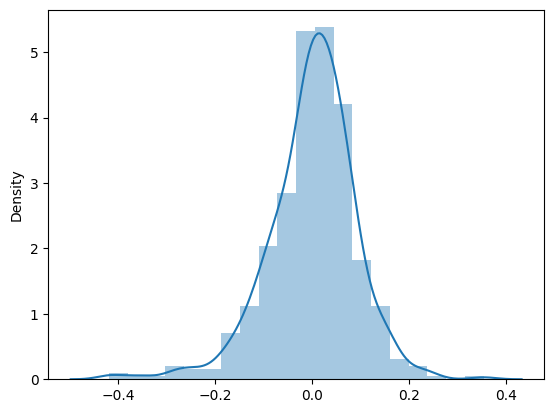

In [38]:
#Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Predicting cnt over training data
y_train_pred=lm.predict(X_train_rfe)

#Residual Error
res=y_train-y_train_pred

#Plotting residual error
sns.distplot(res,bins=20)

- Residual errors are centered around zero and are normally distributed.

##### Predictions and Evaluation on the Test Set

In [39]:
# Scaling numerical variables on the test dataset
num_var=['temp','atemp','hum','windspeed','cnt']
df_test[num_var]=scaler.transform(df_test[num_var])

df_test[num_var].head()

,temp,atemp,hum,windspeed,cnt
184,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.569029


In [40]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Dividing test dataset into X and Y
y_test=df_test.pop('cnt')
X_test=df_test

In [42]:
# Add a constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,...,0,0,0,0,1,0,0,0,1,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,0,1,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,...,0,0,1,0,0,0,0,0,1,0


In [43]:
keep_col=X_train_rfe.columns
keep_col

Index(['const', 'yr', 'temp', 'windspeed', 'Jul', 'Sep', 'Sun', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [44]:
#Removing variables from testset which are not part of the model
X_test_sm=X_test_sm[keep_col]
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          220 non-null    float64
 1   yr             220 non-null    int64  
 2   temp           220 non-null    float64
 3   windspeed      220 non-null    float64
 4   Jul            220 non-null    uint8  
 5   Sep            220 non-null    uint8  
 6   Sun            220 non-null    uint8  
 7   Light Snow     220 non-null    uint8  
 8   Mist + Cloudy  220 non-null    uint8  
 9   spring         220 non-null    uint8  
 10  summer         220 non-null    uint8  
 11  winter         220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 10.3 KB


In [45]:
# predict on test set
y_test_pred = lm.predict(X_test_sm)

In [46]:
# Evaluate
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8057616301094372

We can see that the equation of our best fitted line is:

**cnt=0.2034 + (0.2339 X yr) + (0.4917 X temp) - (0.1497 X windspeed) - (0.0483 X Jul) + (0.0723 X Sep) - (0.0450 X Sun) - (0.2847 X Light Snow) - (0.0802 X Mist Cloudy) - (0.0682 X spring) + (0.0479 X summer) + (0.0818 X winter)**

- yr,temp,Sep,summer,winter seem to have a positive impact on bike rentals
- windspeed,Jul,Sun,Light Snow,Mist Cloudy,spring seem to have a negative impact on bike rentals
- It appears that higher temeratures and good weather are primary factors that leads to high bike rentals.
- To improve bike rentals in future company can experiment with increased advertisements and  offers during the month of September and during summer.